In [1]:
import pandas as pd                #import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data.csv')     #read the data set

In [3]:
data.describe()    #describe the data characteristics

,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
count,166.000000,166.000000,166.000000,166.00000,166.000000,166.000000,166.000000,166.000000,47.000000
mean,65.138554,1.678133,72.379518,1.26506,18.036145,11.036145,10.830663,1.122563,0.988128
std,9.200070,0.085526,12.154333,1.15296,18.270324,11.169706,3.388513,0.216158,0.278708
min,36.000000,1.450000,47.000000,0.00000,0.000000,0.000000,6.230000,0.360000,0.152000
25%,59.000000,1.600000,63.250000,0.00000,0.000000,0.000000,8.857500,1.010750,0.819000
50%,65.000000,1.680000,72.000000,2.00000,18.000000,10.000000,10.175000,1.143500,1.015000
75%,71.000000,1.730000,80.000000,2.00000,32.000000,19.750000,11.977500,1.260500,1.146500
max,86.000000,1.950000,105.000000,3.00000,71.000000,44.000000,36.340000,1.542000,1.532000


In [4]:
data.head()   #visualize the first 5 coloumn of the data set

,ID,Study,Group,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,female,82,1.45,50,3.0,20,10,36.34,0.6635,0.778
1,GaPt04,Ga,PD,male,68,1.71,78,2.5,25,8,11.00,0.6420,0.818
2,GaPt05,Ga,PD,female,82,1.53,51,2.5,24,5,14.50,0.9080,0.614
3,GaPt06,Ga,PD,male,72,1.70,82,2.0,16,13,10.47,0.8480,0.937
4,GaPt07,Ga,PD,female,53,1.67,54,3.0,44,22,18.34,0.6770,0.579


In [5]:
data.drop(['ID','Speed_10'],axis=1,inplace=True) #remove the unnecessary coloumn

In [6]:
data #visualize the data set

,Study,Group,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec)
0,Ga,PD,female,82,1.45,50,3.0,20,10,36.34,0.6635
1,Ga,PD,male,68,1.71,78,2.5,25,8,11.00,0.6420
2,Ga,PD,female,82,1.53,51,2.5,24,5,14.50,0.9080
3,Ga,PD,male,72,1.70,82,2.0,16,13,10.47,0.8480
4,Ga,PD,female,53,1.67,54,3.0,44,22,18.34,0.6770
...,...,...,...,...,...,...,...,...,...,...,...
161,Si,CO,male,60,1.74,72,0.0,0,0,9.20,1.0000
162,Si,CO,male,67,1.90,95,0.0,0,0,12.52,1.1200
163,Si,CO,male,61,1.70,72,0.0,0,0,12.65,0.9900
164,Si,CO,male,53,1.70,87,0.0,0,0,11.41,1.2900


In [7]:
Gend = pd.get_dummies(data['Gender'],drop_first=True) #gender is converted into numerical values

In [8]:
Stud=pd.get_dummies(data['Study'])  #study is converted into numerical values

In [9]:
Grou=pd.get_dummies(data['Group'],drop_first=True)  #group(Ga,Ju,Si) is converted into numerical values

In [10]:
data.drop(['Gender','Study','Group'],axis=1,inplace=True)  #drop the features to convert into numerical values

In [11]:
data = pd.concat([data,Gend,Stud,Grou],axis=1) #The new numerical features were replaced

In [12]:
data #visualize the data set with numerical values

,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),male,Ga,Ju,Si,PD
0,82,1.45,50,3.0,20,10,36.34,0.6635,0,1,0,0,1
1,68,1.71,78,2.5,25,8,11.00,0.6420,1,1,0,0,1
2,82,1.53,51,2.5,24,5,14.50,0.9080,0,1,0,0,1
3,72,1.70,82,2.0,16,13,10.47,0.8480,1,1,0,0,1
4,53,1.67,54,3.0,44,22,18.34,0.6770,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,60,1.74,72,0.0,0,0,9.20,1.0000,1,0,0,1,0
162,67,1.90,95,0.0,0,0,12.52,1.1200,1,0,0,1,0
163,61,1.70,72,0.0,0,0,12.65,0.9900,1,0,0,1,0
164,53,1.70,87,0.0,0,0,11.41,1.2900,1,0,0,1,0


C:\Users\musthaq ahamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\musthaq ahamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


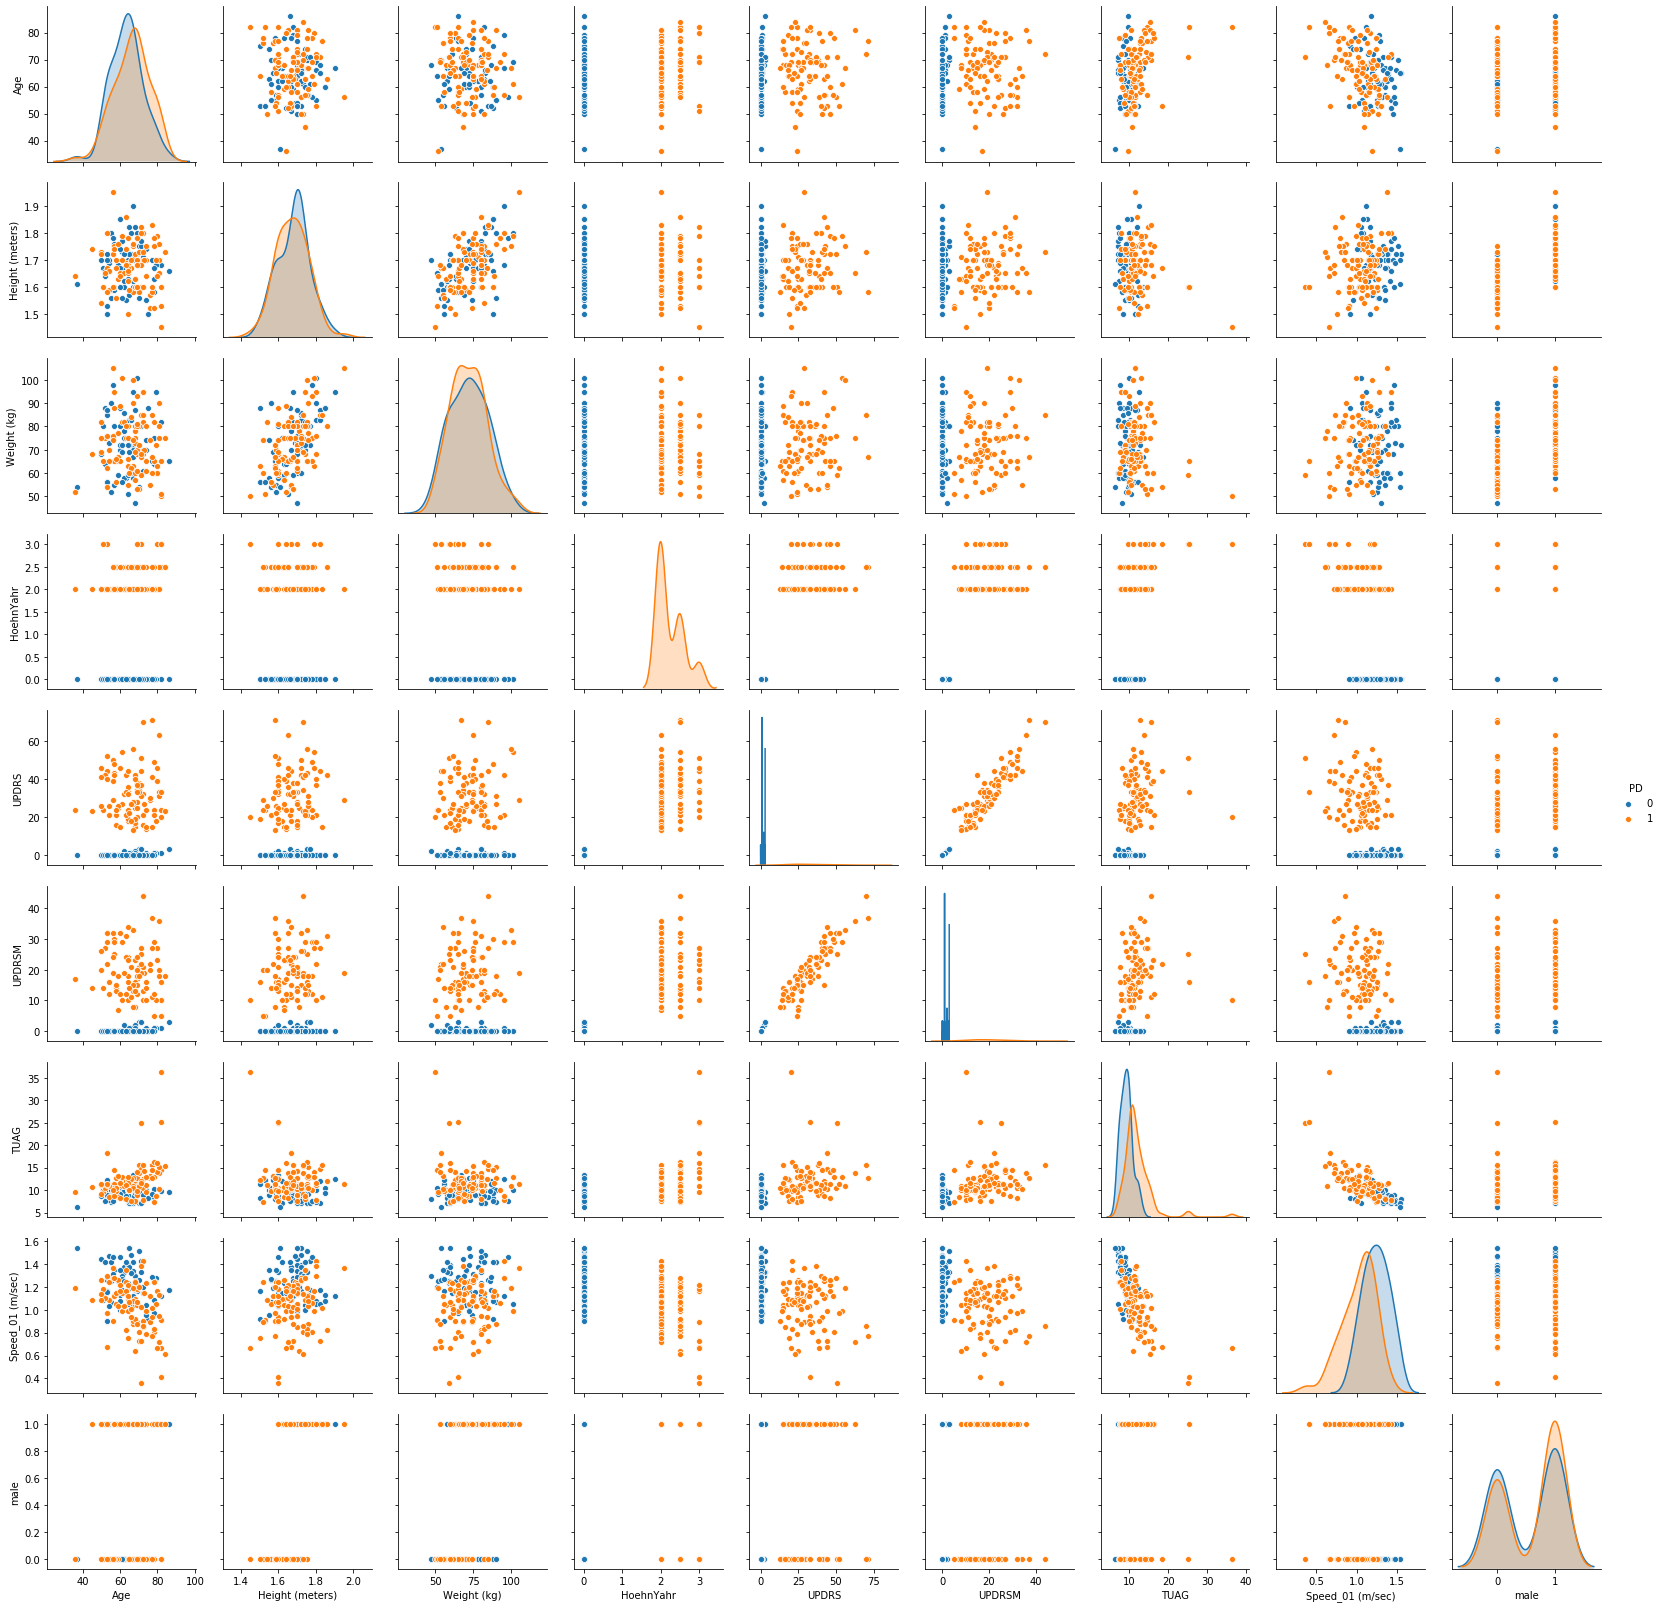

In [13]:
sns.pairplot(data, hue = 'PD', vars = ['Age','Height (meters)','Weight (kg)','HoehnYahr','UPDRS','UPDRSM','TUAG','Speed_01 (m/sec)','male']) #pairplot development

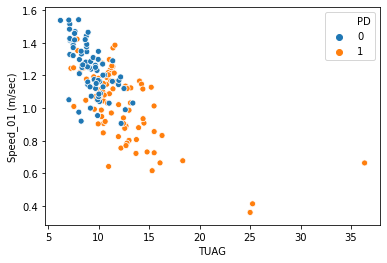

In [14]:
sns.scatterplot( x = 'TUAG', y = 'Speed_01 (m/sec)',hue = 'PD', data = data) #scatter plot of the paticular features before normalization

(13, 0)

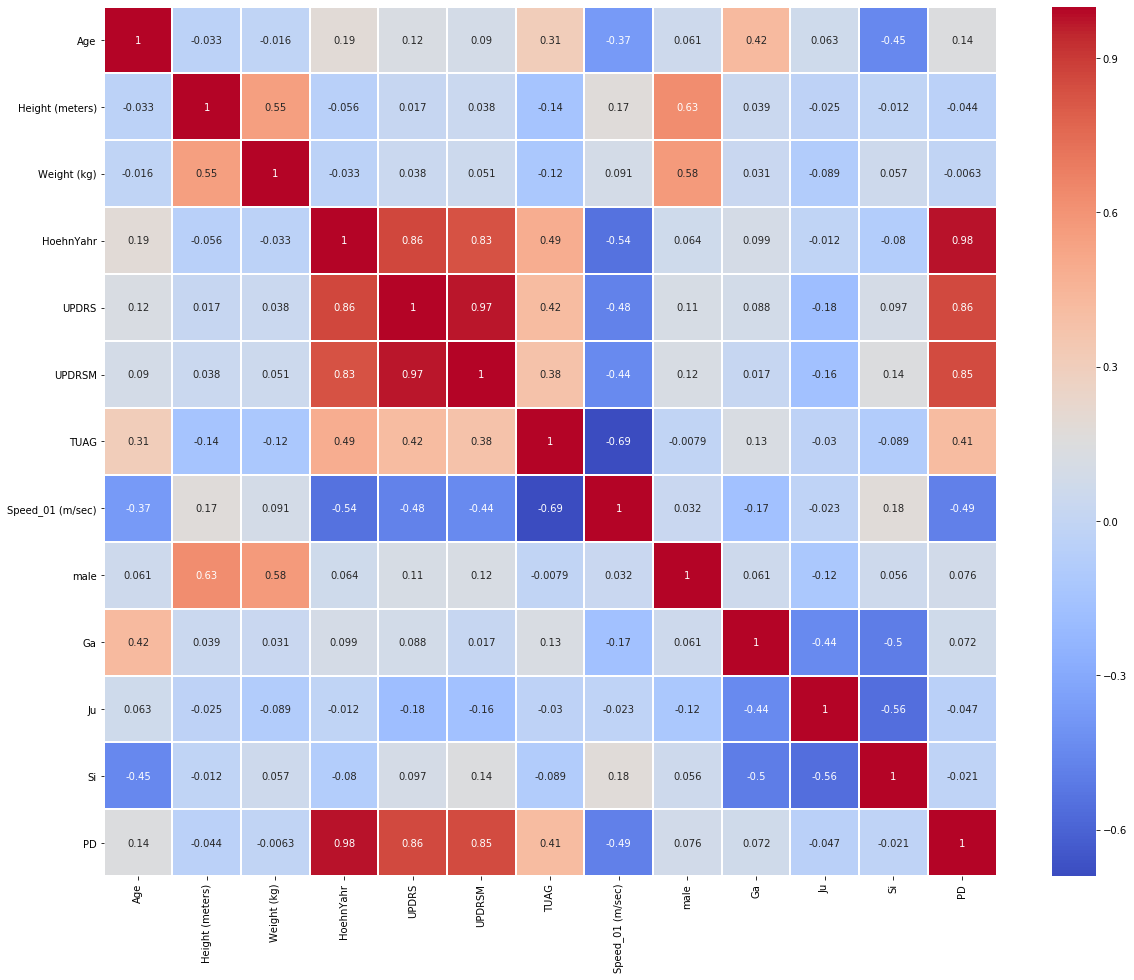

In [15]:
plt.figure(figsize=(20,16))  #correlation heatmap development
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linecolor='white',linewidths=1)
plt.ylim(13,0)

In [17]:
data.drop(['Weight (kg)','HoehnYahr','UPDRS','UPDRSM'],axis = 1,inplace = True) #drop the unnecessary features

In [18]:
X = data.drop(['PD'], axis = 1)  #define the features as X 

In [19]:
y = data['PD']  #define the label as Y

In [20]:
from sklearn.model_selection import train_test_split #import the data selection libraries

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) #data seperation for training testing

In [22]:
from sklearn.svm import SVC #import the SVC model

In [23]:
from sklearn.metrics import classification_report,confusion_matrix #import the performance evaluavtion matrices

In [24]:
svc_model = SVC()  #assin the SVC model 

In [25]:
svc_model.fit(X_train,y_train) #train the model

C:\Users\musthaq ahamed\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
y_predict = svc_model.predict(X_test) #testing the model

In [27]:
cm = confusion_matrix(y_test, y_predict) #define the confusion matrix as cm

(2, 0)

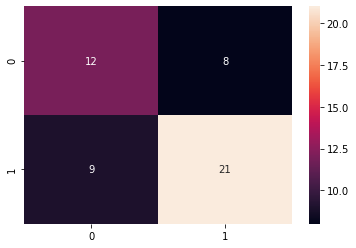

In [28]:
sns.heatmap(cm, annot=True)  #visualize the confusion matrix
plt.ylim(2,0)

In [51]:
print(classification_report(y_test, y_predict)) #print the performance of the algorithm

              precision    recall  f1-score   support

           0       0.55      0.30      0.39        20
           1       0.64      0.83      0.72        30

    accuracy                           0.62        50
   macro avg       0.59      0.57      0.56        50
weighted avg       0.60      0.62      0.59        50



In [29]:
#Model improvemt 

In [30]:
#Normalization

In [31]:
min_train = X_train.min()  

In [32]:
range_train = (X_train-min_train).max()  #get the minimum values of training features

In [33]:
X_train_scaled = (X_train-min_train)/range_train   #get range of the data features

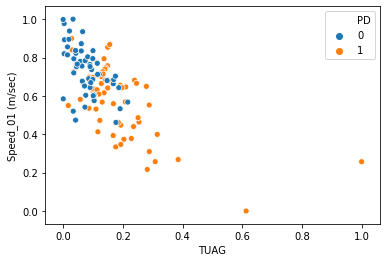

In [34]:
sns.scatterplot( x = X_train_scaled['TUAG'], y =X_train_scaled ['Speed_01 (m/sec)'],hue = 'PD', data = data) #viasualize the particular faetures after normalization

In [35]:
min_test = X_test.min()     #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [36]:
svc_model.fit(X_train_scaled, y_train)  #train the model after the normalization

C:\Users\musthaq ahamed\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
y_predict = svc_model.predict(X_test_scaled) #testing the data

In [38]:
cm = confusion_matrix(y_test, y_predict)  #define the confusion matrix as cm

(2, 0)

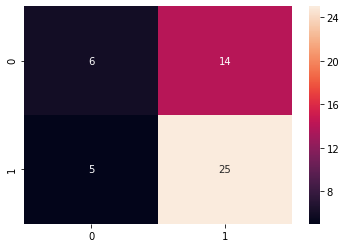

In [39]:
sns.heatmap(cm, annot=True)   #visualize the confusion matrix
plt.ylim(2,0)

In [40]:
print(classification_report(y_test, y_predict))   #print the performance of the algorithm

              precision    recall  f1-score   support

           0       0.55      0.30      0.39        20
           1       0.64      0.83      0.72        30

    accuracy                           0.62        50
   macro avg       0.59      0.57      0.56        50
weighted avg       0.60      0.62      0.59        50



In [41]:
#Grid search

In [42]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']} #using the rbf kernal and finding best fitting parameters

In [43]:
from sklearn.model_selection import GridSearchCV #import grid search method

In [44]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4) #define the grid

In [45]:
grid.fit(X_train_scaled,y_train) #finding the best fitting parameters

C:\Users\musthaq ahamed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.538, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.538, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.553, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.538, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.538, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.553, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished
C:\Users\musthaq ahamed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [46]:
grid.best_params_   #display the optimum parameters value

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [47]:
grid_predictions = grid.predict(X_test_scaled) #testing the model with optimum parameter tuning

In [48]:
cm = confusion_matrix(y_test,grid_predictions)  #define the confusion matrix as cm

(2, 0)

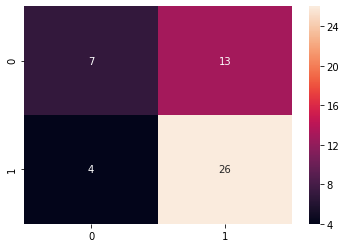

In [49]:
sns.heatmap(cm, annot = True) #visualize the confusion matrix
plt.ylim(2,0)

In [50]:
print(classification_report(y_test,grid_predictions)) #model performance results

              precision    recall  f1-score   support

           0       0.64      0.35      0.45        20
           1       0.67      0.87      0.75        30

    accuracy                           0.66        50
   macro avg       0.65      0.61      0.60        50
weighted avg       0.65      0.66      0.63        50

